In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [24]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [25]:
fields = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42),
   item_tfms=RandomResizedCrop(224, min_scale=0.5),
   batch_tfms=aug_transforms())

In [26]:
dls = fields.dataloaders('../input/brain-tumor-classification-mri')

In [27]:
dls.vocab

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

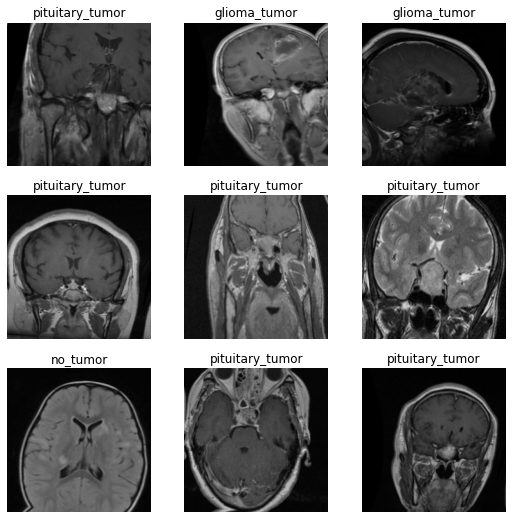

In [28]:
dls.show_batch()

In [29]:
learn = vision_learner(dls,resnet152,metrics = [accuracy,error_rate])

In [30]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.255489,1.411662,0.639571,0.360429,00:38


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.577816,0.472272,0.883436,0.116564,00:44


SuggestedLRs(valley=6.30957365501672e-05)

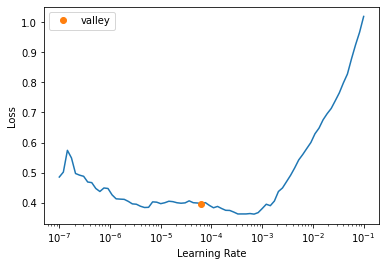

In [31]:
learn.lr_find()

In [32]:
learn.fit_one_cycle(10,6e-5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.342697,0.394463,0.883436,0.116564,00:44
1,0.280726,0.271723,0.930982,0.069018,00:44
2,0.238160,0.256991,0.932515,0.067485,00:44
3,0.189149,0.264020,0.930982,0.069018,00:45
4,0.147131,0.180006,0.949386,0.050613,00:45
5,0.111115,0.187801,0.950920,0.049080,00:44
6,0.083351,0.165325,0.949386,0.050613,00:45
7,0.062587,0.147931,0.953988,0.046012,00:44
8,0.047240,0.158648,0.947853,0.052147,00:45
9,0.041124,0.155038,0.950920,0.049080,00:45


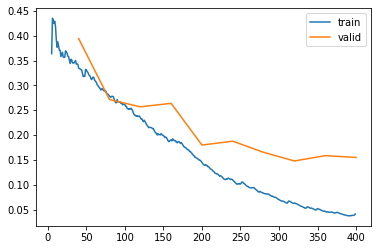

In [33]:
learn.recorder.plot_loss()

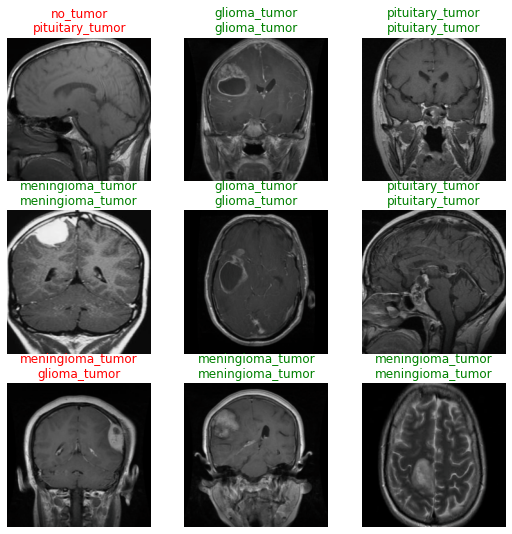

In [34]:
learn.show_results()

In [35]:
learn.unfreeze()
learn.fit_one_cycle(10,lr_max=slice(1e-5,6e-5))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.038016,0.143213,0.952454,0.047546,00:45
1,0.031591,0.148025,0.960123,0.039877,00:45
2,0.039359,0.147131,0.966258,0.033742,00:45
3,0.039770,0.190838,0.958589,0.041411,00:44
4,0.036003,0.136795,0.969325,0.030675,00:44
5,0.033486,0.125967,0.963190,0.036810,00:44
6,0.028455,0.142602,0.963190,0.036810,00:44
7,0.026132,0.144197,0.961656,0.038344,00:44
8,0.025348,0.142506,0.958589,0.041411,00:44
9,0.022355,0.140281,0.960123,0.039877,00:43


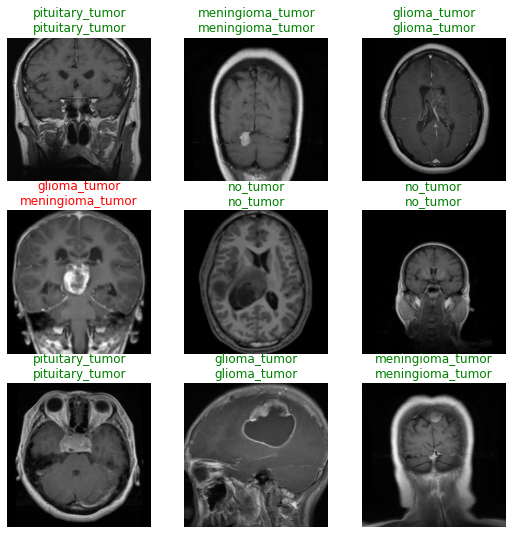

In [36]:
learn.show_results()

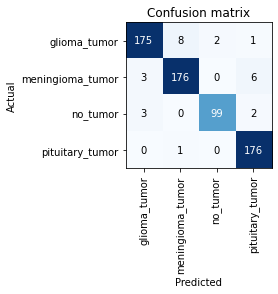

In [38]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

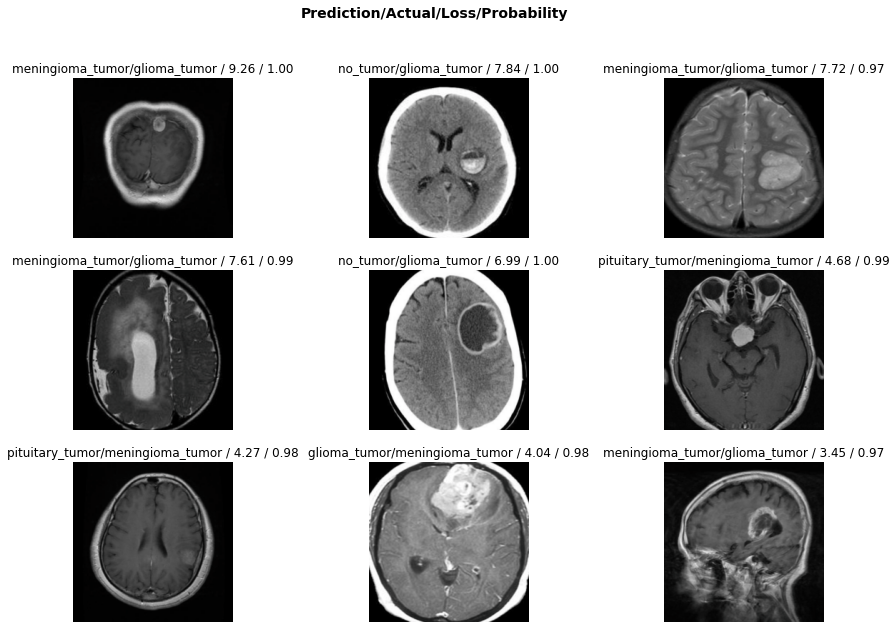

In [39]:
interp.plot_top_losses(9, figsize=(15,10))

In [40]:
learn.predict(path/'../input/brain-tumor-classification-mri/Testing/glioma_tumor/image(1).jpg')

('glioma_tumor',
 TensorBase(0),
 TensorBase([9.9999e-01, 2.3964e-07, 6.2279e-06, 8.9908e-07]))

In [41]:
learn.export()

In [42]:
path = Path()
learn_inf = load_learner(path/'export.pkl')

In [43]:
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description='Classify')
out_pl = widgets.Output()
lbl_pred = widgets.Label()

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    
btn_run.on_click(on_click_classify)

In [44]:
VBox([widgets.Label('Select your MRI'),btn_upload, btn_run, out_pl, lbl_pred])